In [35]:
json_spec = dict(file_url='https://drive.google.com/uc?id=16N0RV4fHI6joBuKbQAoG34V_cQk7vxSA', file_path='ffhq-dataset-v2.json', file_size=267793842, file_md5='425ae20f06a4da1d4dc0f46d40ba5fd6')
from collections import OrderedDict, defaultdict
import json, os
with open(os.path.join('/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d',json_spec['file_path']), 'rb') as f:
    json_data = json.load(f, object_pairs_hook=OrderedDict)

KeyboardInterrupt: 

In [ ]:
import random
import numpy as np
key = random.choice(list(json_data.keys()))

lm = np.array(json_data[key]['in_the_wild']['face_landmarks'])


array([1970., 1994., 2030., 2058., 2126., 2230., 2358., 2494., 2642.,
       2794., 2914., 3034., 3142., 3214., 3246., 3286., 3310., 2074.,
       2158., 2290., 2418., 2542., 2730., 2850., 2986., 3118., 3210.,
       2634., 2638., 2642., 2650., 2474., 2562., 2650., 2738., 2822.,
       2202., 2282., 2370., 2454., 2366., 2274., 2830., 2906., 2998.,
       3082., 3006., 2914., 2338., 2446., 2562., 2654., 2738., 2854.,
       2962., 2854., 2742., 2650., 2554., 2442., 2378., 2562., 2654.,
       2738., 2926., 2738., 2650., 2558.])

In [ ]:
lm_chin          = lm[0  : 17]  # left-right
lm_eyebrow_left  = lm[17 : 22]  # left-right
lm_eyebrow_right = lm[22 : 27]  # left-right
lm_nose          = lm[27 : 31]  # top-down
lm_nostrils      = lm[31 : 36]  # top-down
lm_eye_left      = lm[36 : 42]  # left-clockwise
lm_eye_right     = lm[42 : 48]  # left-clockwise
lm_mouth_outer   = lm[48 : 60]  # left-clockwise
lm_mouth_inner   = lm[60 : 68]  # left-clockwise

# Calculate auxiliary vectors.
eye_left     = np.mean(lm_eye_left, axis=0)
eye_right    = np.mean(lm_eye_right, axis=0)
eye_avg      = (eye_left + eye_right) * 0.5
eye_to_eye   = eye_right - eye_left
mouth_left   = lm_mouth_outer[0]
mouth_right  = lm_mouth_outer[6]
mouth_avg    = (mouth_left + mouth_right) * 0.5
eye_to_mouth = mouth_avg - eye_avg

# Choose oriented crop rectangle.
x = eye_to_eye - np.flipud(eye_to_mouth) * [-1, 1]

x /= np.hypot(*x)
temp_x = x
x *= max(np.hypot(*eye_to_eye) * 2.0, np.hypot(*eye_to_mouth) * 1.8)
y = np.flipud(x) * [-1, 1]
q_scale = 1.8
x = q_scale * x
y = q_scale * y
c = eye_avg + eye_to_mouth * 0.1
quad = np.stack([c - x - y, c - x + y, c + x + y, c + x - y])
qsize = np.hypot(*x) * 2

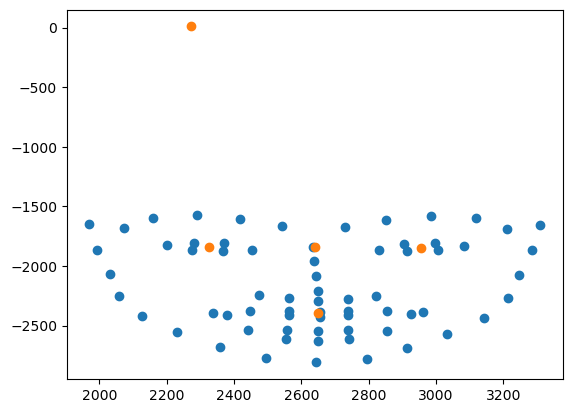

In [ ]:
import matplotlib.pyplot as plt


core_pts = np.concatenate([eye_left.reshape(1,2),eye_right.reshape(1,2),\
    mouth_avg.reshape(1,2),eye_avg.reshape(1,2),x.reshape(1,2)],0)

plt.scatter(lm[:,0],-lm[:,-1])


plt.scatter(core_pts[:,0], -core_pts[:,1])

In [ ]:
eye_to_mouth,np.flipud(eye_to_mouth)

(array([  9.66666667, 550.33333333]), array([550.33333333,   9.66666667]))

In [ ]:
tri_path ='/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/triplane_sample.npy'
import numpy as np
triplane = np.load(tri_path)

(256, 256)


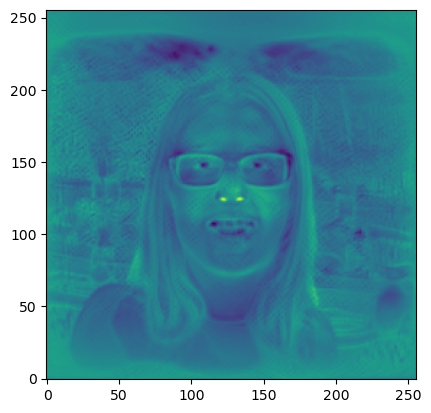

In [ ]:
one = triplane.squeeze(0)[0].sum(0)
one = (one-one.min())/(one.max()-one.min())
import matplotlib.pyplot as plt
print(one.shape)
plt.imshow(one,origin='lower')

In [2]:



#image_wpp = torch.tensor(resize(io.imread(wpp_path+'/'+item),(256,256*5)).transpose(2,0,1))
#image_wpp = (image_wpp.to(torch.float32) ).unsqueeze(0)

#image_w_depth = torch.tensor(resize(io.imread(w_depth_path+'/'+item),(256,256*5)).transpose(2,0,1))
#image_w_depth = (image_w_depth.to(torch.float32) ).unsqueeze(0)

In [6]:
image_w.max(),image_w.min()

(tensor(1.), tensor(-1.))

In [7]:
gt = image_w[...,:256]
w_left = image_w[...,256*2:256*3]
wp_left = image_wp[...,256*2:256*3]

w_right = image_w[...,256*4:256*5]
wp_right = image_wp[...,256*4:256*5]

w_middle = image_w[...,256*3:256*4]
wp_middle = image_wp[...,256*3:256*4]

#w_depth_left = image_w_depth[...,256*2:256*3]

In [8]:
from training.idloss import IDLoss
criterion_ID  = IDLoss()


Loading ResNet ArcFace


In [8]:
loss_id = criterion_ID(gt, w_left)
print(loss_id)

loss_id_wp_left = criterion_ID(gt, wp_left)
print(loss_id_wp_left)

loss_id_w_depth_left = criterion_ID(gt, w_depth_left)
print(loss_id_w_depth_left)

tensor([0.6146], grad_fn=<RsubBackward1>)
tensor([0.5363], grad_fn=<RsubBackward1>)


NameError: name 'w_depth_left' is not defined

In [ ]:
loss_id = criterion_ID(gt, w_right)
print(loss_id)

loss_id_wp_right = criterion_ID(gt, wp_right)
print(loss_id_wp_right)

loss_id_w_depth_right = criterion_ID(gt, w_depth_right)
print(loss_id_w_depth_right)

tensor([0.0003], grad_fn=<RsubBackward1>)
tensor([0.0003], grad_fn=<RsubBackward1>)
tensor([0.0003], grad_fn=<RsubBackward1>)


In [ ]:
loss_id = criterion_ID(gt, w_middle)
print(loss_id)

loss_id_wp_middle = criterion_ID(gt, wp_middle)
print(loss_id_wp_middle)

#loss_id_w_depth_middle = criterion_ID(gt, w_depth_middle)
#print(loss_id_w_depth_middle)

tensor([0.8880], grad_fn=<RsubBackward1>)
tensor([0.8304], grad_fn=<RsubBackward1>)


In [ ]:
gt.max(), w_middle.max()

import matplotlib.pyplot as plt
import numpy
plt.imshow(numpy.array(gt[0].permute((1,2,0))))
plt.show()
plt.imshow(numpy.array(w_middle[0].permute((1,2,0))))
plt.show()
plt.imshow(numpy.array(wp_middle[0].permute((1,2,0))))
plt.show()
#plt.imshow(numpy.array(w_depth_middle[0].permute((1,2,0))))

In [9]:
import matplotlib.pyplot as plt
plt.imshow(w_depth_middle.squeeze(0).permute(1,2,0).numpy())

NameError: name 'w_depth_middle' is not defined

In [ ]:
meta_path ='/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/inthewild_data/dataset.json'

In [ ]:
import json

with open(meta_path, "r") as json_file:

    meta = json.load(json_file)
meta.keys()

dict_keys(['labels'])

In [ ]:

meta = dict(meta['labels'])

In [ ]:
import numpy as np
save_path ='/home/nas4_user/jaeseonglee/ICCV2023/HFGI3D/test_imgs'
for k in meta.keys():
    print(np.array(meta[k]).shape)
    np.save(os.path.join(save_path,k)[:-4], np.array(meta[k]))

(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)
(25,)


In [1]:
import os
import cv2
import numpy as np
import glob
import os.path as osp
from insightface.model_zoo import model_zoo


class LandmarkModel():
    def __init__(self, name, root='./checkpoints'):
        self.models = {}
        root = os.path.expanduser(root)
        onnx_files = glob.glob(osp.join(root, name, '*.onnx'))
        onnx_files = sorted(onnx_files)
        for onnx_file in onnx_files:
            if onnx_file.find('_selfgen_')>0:
                continue
            model = model_zoo.get_model(onnx_file)
            if model.taskname not in self.models:
                print('find model:', onnx_file, model.taskname)
                self.models[model.taskname] = model
            else:
                print('duplicated model task type, ignore:', onnx_file, model.taskname)
                del model
        assert 'detection' in self.models
        self.det_model = self.models['detection']


    def prepare(self, ctx_id, det_thresh=0.5, det_size=(640, 640), mode ='None'):
        self.det_thresh = det_thresh
        self.mode = mode
        assert det_size is not None
        print('set det-size:', det_size)
        self.det_size = det_size
        for taskname, model in self.models.items():
            if taskname=='detection':
                model.prepare(ctx_id, input_size=det_size)
            else:
                model.prepare(ctx_id)


    def get(self, img, max_num=0):
        bboxes, kpss = self.det_model.detect(img, threshold=self.det_thresh, max_num=max_num, metric='default')
        if bboxes.shape[0] == 0:
            return None
        det_score = bboxes[..., 4]

        # select the face with the hightest detection score
        best_index = np.argmax(det_score)

        kps = None
        if kpss is not None:
            kps = kpss[best_index]
        return kps

    def gets(self, img, max_num=0):
        bboxes, kpss = self.det_model.detect(img, threshold=self.det_thresh, max_num=max_num, metric='default')
        return kpss


In [2]:
landmarkModel = LandmarkModel(name='landmarks', root = '/home/nas4_user/jaeseonglee/ICCV2023/eg3d_ckpts')
landmarkModel.prepare(ctx_id= 0, det_thresh=0.6, det_size=(256,256))

input mean and std: 127.5 127.5
find model: /home/nas4_user/jaeseonglee/ICCV2023/eg3d_ckpts/landmarks/glintr100.onnx recognition
find model: /home/nas4_user/jaeseonglee/ICCV2023/eg3d_ckpts/landmarks/scrfd_10g_bnkps.onnx detection
set det-size: (256, 256)


In [20]:
import imageio as io
from skimage.transform import resize
ffhq_path = '/home/nas1_userA/taeukim/hs/data/ffhq1024/00000/00000.png'
img = resize(io.imread(ffhq_path),(256,256))*255#.transpose(2,0,1)

In [19]:
img.max()

1.0

In [26]:
landmark.shape

(5, 2)

2022-12-30 15:15:25.049686352 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,10} does not match actual shape of {128,10} for output 500
2022-12-30 15:15:25.049841552 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,4} does not match actual shape of {128,4} for output 497
2022-12-30 15:15:25.049953202 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,1} does not match actual shape of {128,1} for output 494
2022-12-30 15:15:25.050723292 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,10} does not match actual shape of {512,10} for output 477
2022-12-30 15:15:25.050859692 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,4} does not match actual shape of {512,4} for output 474
2022-12-30 15:15:25.050981852 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expec

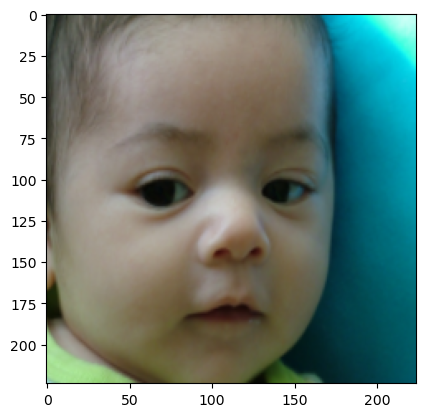

In [23]:
landmark = landmarkModel.get(img)
aligned_img_gt= align_img(img, landmark, size=224)
plt.imshow(aligned_img_gt/255)

In [15]:
landmark

In [8]:
img.max()

1.0

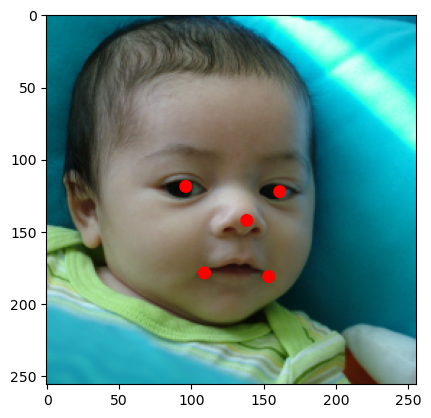

In [25]:
import matplotlib.pyplot as plt


fig,ax = plt.subplots(1)
ax.set_aspect('equal')
from matplotlib.patches import Circle
# Show the image
ax.imshow(img/255)

# Now, loop through coord arrays, and create a circle at each x,y pair
for i in range(5):
    circ = Circle((landmark[i,0],landmark[i,1]),4, color='r')
    ax.add_patch(circ)

# Show the image
plt.show()

In [ ]:
gt_np = (np.array(gt[0].permute(1,2,0)) + 1)*127.5
gt_np.max()

In [29]:
import numpy as np
import cv2


def align_with_five_points(src_points, size=224):

    REFERENCE_FACIAL_POINTS = [
        [30.29459953,  51.69630051],
        [65.53179932,  51.50139999],
        [48.02519989,  71.73660278],
        [33.54930115,  92.3655014],
        [62.72990036,  92.20410156]
    ]
    REFERENCE_FACIAL_POINTS = np.array(REFERENCE_FACIAL_POINTS)
    REFERENCE_FACIAL_POINTS[:, 0] += 8
    REFERENCE_FACIAL_POINTS *= size / 112.0


    dst_points = REFERENCE_FACIAL_POINTS
    # align dst to src
    src_pts = np.matrix(src_points.astype(np.float64))
    dst_pts = np.matrix(dst_points.astype(np.float64))

    tfm = np.float32([[1, 0, 0], [0, 1, 0]])
    n_pts = src_pts.shape[0]
    ones = np.ones((n_pts, 1), src_pts.dtype)
    src_pts_ = np.hstack([src_pts, ones])
    dst_pts_ = np.hstack([dst_pts, ones])

    A, res, rank, s = np.linalg.lstsq(src_pts_, dst_pts_)

    if rank == 3:
        tfm = np.float32([
            [A[0, 0], A[1, 0], A[2, 0]],
            [A[0, 1], A[1, 1], A[2, 1]]
        ])
    elif rank == 2:
        tfm = np.float32([
            [A[0, 0], A[1, 0], 0],
            [A[0, 1], A[1, 1], 0]
        ])
    return tfm

def align_with_five_points_tensor(src_points, size=224):

    REFERENCE_FACIAL_POINTS = [
        [30.29459953,  51.69630051],
        [65.53179932,  51.50139999],
        [48.02519989,  71.73660278],
        [33.54930115,  92.3655014],
        [62.72990036,  92.20410156]
    ]
    REFERENCE_FACIAL_POINTS = np.array(REFERENCE_FACIAL_POINTS)
    REFERENCE_FACIAL_POINTS[:, 0] += 8
    REFERENCE_FACIAL_POINTS *= size / 112.0


    dst_points = REFERENCE_FACIAL_POINTS
    # align dst to src
    src_pts = np.matrix(src_points.astype(np.float64))
    dst_pts = np.matrix(dst_points.astype(np.float64))

    tfm = np.float32([[1, 0, 0], [0, 1, 0]])
    n_pts = src_pts.shape[0]
    ones = np.ones((n_pts, 1), src_pts.dtype)
    src_pts_ = np.hstack([src_pts, ones])
    dst_pts_ = np.hstack([dst_pts, ones])

    A, res, rank, s = np.linalg.lstsq(src_pts_, dst_pts_)

    if rank == 3:
        tfm = np.float32([
            [A[0, 0], A[1, 0], A[2, 0]],
            [A[0, 1], A[1, 1], A[2, 1]]
        ])
    elif rank == 2:
        tfm = np.float32([
            [A[0, 0], A[1, 0], 0],
            [A[0, 1], A[1, 1], 0]
        ])
    return tfm


def back_matrix(affine_matrix):
    back_matrix = np.zeros((3, 3))
    back_matrix[0:2, :] = affine_matrix
    back_matrix[2, 2] = 1
    back_matrix = np.linalg.pinv(back_matrix)
    back_matrix = back_matrix[0:2, :]
    return back_matrix


def align_img(img, src_lmks, size=224):
    M = align_with_five_points(src_lmks, size)
    aligned_img = cv2.warpAffine(img, M, (size, size), flags=cv2.INTER_LINEAR)
    return aligned_img#, back_matrix(M[:2])

def align_img_tensor(img, src_lmks, size = 224):
    M = align_with_five_points_tensor(src_lmks, size)
    aligned_img = cv2.warpAffine(img, M, (size, size), flags=cv2.INTER_LINEAR)
    return aligned_img#, back_matrix(M[:2])

def dealign(generated, origin, back_affine_matrix,  mask):
    kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT,ksize=(11,11))

    mask[mask > 0.001] = 1.0
    mask = cv2.dilate(mask, kernel)
    mask = cv2.erode(mask,kernel,iterations=2)

    mask = cv2.blur(mask,(7,7))

    mask_1 = np.zeros_like(mask, dtype=np.float32)
    mask_1[10:-10, 10:-10] = 1.0
    mask_1 = cv2.blur(mask_1, (11, 11))
    mask = mask * mask_1

    target_image = cv2.warpAffine(generated, back_affine_matrix, (origin.shape[1], origin.shape[0]))
    mask = cv2.warpAffine(mask, back_affine_matrix, (origin.shape[1], origin.shape[0]))

    mask = mask[..., np.newaxis]

    dealigned_img = target_image * mask + origin * (1 - mask)

    dealigned_img = dealigned_img.clip(0, 255.0).astype(np.uint8)
    
    return dealigned_img

In [13]:
def face_align(landmarkModel, image_path, merge_result=False, image_size=224):
    if os.path.isfile(image_path):
        img_list = [image_path]
    else:
        img_list = [os.path.join(image_path, x) for x in os.listdir(image_path) if x.endswith('png') or x.endswith('jpg') or x.endswith('jpeg')]
    for path in img_list:
        img = cv2.imread(path)
        #print(img.shape)
        #img = cv2.resize(img,(224,224))
        landmark = landmarkModel.get(img)
        #print(landmark)
        if landmark is not None:
            base_path = path.replace('.png', '').replace('.jpg', '').replace('.jpeg', '')
            aligned_img, back_matrix = align_img(img, landmark, image_size)
            # np.save(base_path + '.npy', landmark)
            cv2.imwrite(base_path + '_aligned.png', aligned_img)
            #plt.imshow(aligned_img)
            if merge_result:
                np.save(base_path + '_back.npy', back_matrix)
    return aligned_img

In [11]:
gt_np = (np.array(gt[0].permute(1,2,0)) + 1)*127.5
gt_np.max()


255.0

In [12]:
landmark = landmarkModel.get(gt_np)
aligned_img_gt= align_img(gt_np, landmark, size=224)

#align = face_align(landmarkModel, '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/inthewild_data/jaeseong2.png')

2022-12-14 17:01:38.951966327 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,10} does not match actual shape of {128,10} for output 500
2022-12-14 17:01:38.952156367 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,4} does not match actual shape of {128,4} for output 497
2022-12-14 17:01:38.952287256 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,1} does not match actual shape of {128,1} for output 494
2022-12-14 17:01:38.968455436 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,10} does not match actual shape of {512,10} for output 477
2022-12-14 17:01:38.968700485 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,4} does not match actual shape of {512,4} for output 474
2022-12-14 17:01:38.968883005 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expec

NameError: name 'align_img' is not defined

In [50]:
landmark.shape

(5, 2)

In [51]:
kps = landmarkModel.gets(gt_np)
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

2022-12-14 12:36:54.711784669 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,10} does not match actual shape of {128,10} for output 500
2022-12-14 12:36:54.712087598 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,4} does not match actual shape of {128,4} for output 497
2022-12-14 12:36:54.712205447 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,1} does not match actual shape of {128,1} for output 494
2022-12-14 12:36:54.712995504 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,10} does not match actual shape of {512,10} for output 477
2022-12-14 12:36:54.713154223 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,4} does not match actual shape of {512,4} for output 474
2022-12-14 12:36:54.713291153 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expec

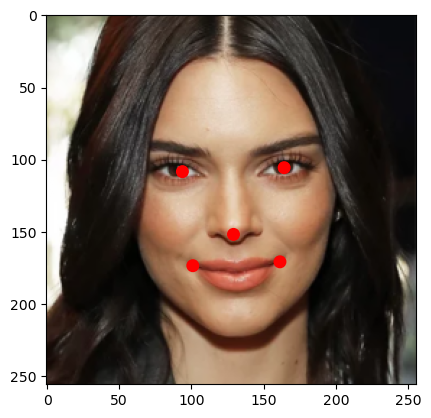

/home/nas4_user/jaeseonglee/anaconda3/envs/eg3d/lib/python3.9/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


In [8]:
lmdks.shape

(1, 1, 5, 2)

In [142]:
def torch2np(x):
    x = np.array(x)
    return (x+1)/2

def np2torch(x):
    return 2*torch.tensor(x)-1

def np2img(x):
    return x.transpose((1,2,0))

In [47]:

import matplotlib.pyplot as plt
import numpy as np

In [63]:
lmdks.shape

(1, 1, 5, 2)

In [9]:
landmark, lmdks

NameError: name 'landmark' is not defined

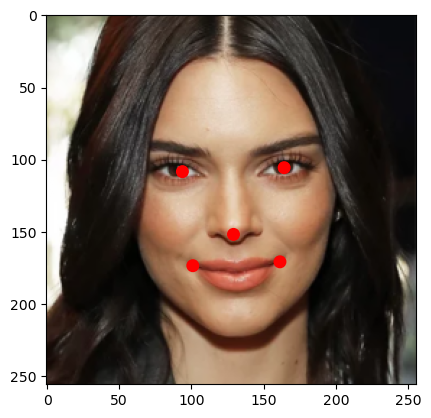

In [54]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(gt_np/255)

# Now, loop through coord arrays, and create a circle at each x,y pair
for i in range(5):
    circ = Circle((landmark[i,0],landmark[i,1]),4, color='r')
    ax.add_patch(circ)

# Show the image
plt.show()

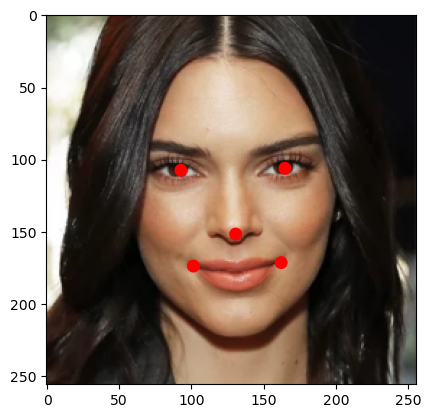

In [73]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(gt_np/255)

# Now, loop through coord arrays, and create a circle at each x,y pair
for i in range(5):
    circ = Circle((lmdks[0,0,i,0],lmdks[0,0,i,1]),4, color='r')
    ax.add_patch(circ)

# Show the image
plt.show()

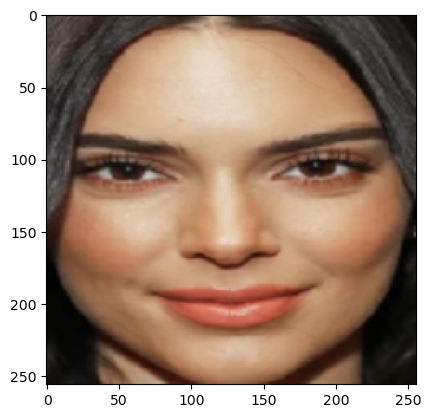

In [59]:
plt.imshow(np2img(torch2np(img_cropped[0])))

In [23]:
gt.min()

tensor(-1.)

In [16]:
gt.shape

torch.Size([1, 3, 256, 256])

In [62]:
print(kps)

print(landmark)

[[[ 93.726494 108.204956]
  [164.20633  105.466446]
  [129.11676  151.68478 ]
  [100.95699  173.36136 ]
  [161.301    170.68387 ]]]
[[ 93.726494 108.204956]
 [164.20633  105.466446]
 [129.11676  151.68478 ]
 [100.95699  173.36136 ]
 [161.301    170.68387 ]]


In [48]:
from training.mobile_face_net import load_face_landmark_detector
landmark_detector = load_face_landmark_detector()
REFERENCE_FACIAL_POINTS = [
        [30.29459953,  51.69630051],
        [65.53179932,  51.50139999],
        [48.02519989,  71.73660278],
        [33.54930115,  92.3655014],
        [62.72990036,  92.20410156]
    ]
kps_tensor= landmark_detector.get_face_landmark(gt)

REFERENCE_FACIAL_POINTS[0][0]

30.29459953

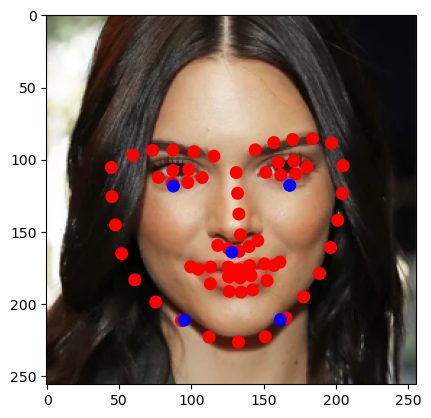

In [61]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
kps_tensor.shape
ax.imshow(gt_np/255)
kps_tensor = np.array(kps_tensor)
# Now, loop through coord arrays, and create a circle at each x,y pair
for i in range(68):
    circ = Circle((kps_tensor[0,i,0],kps_tensor[0,i,1]),4, color='r')
    ax.add_patch(circ)
    pass
for i in range(5):
    circ = Circle((REFERENCE_FACIAL_POINTS[i][0]*256/112+8*256/112,REFERENCE_FACIAL_POINTS[i][1]*256/112),4, color='b')
    ax.add_patch(circ)
plt.show()


In [18]:
kps.shape

(1, 5, 2)

In [50]:
w_np = (np.array(w_middle[0].permute(1,2,0)) + 1)*127.5
landmark = landmarkModel.get(w_np)
aligned_img_w = align_img(w_np, landmark, size=224)

2022-12-13 15:51:10.281450548 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,10} does not match actual shape of {128,10} for output 500
2022-12-13 15:51:10.281631948 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,4} does not match actual shape of {128,4} for output 497
2022-12-13 15:51:10.281768567 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,1} does not match actual shape of {128,1} for output 494
2022-12-13 15:51:10.282593856 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,10} does not match actual shape of {512,10} for output 477
2022-12-13 15:51:10.282760555 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,4} does not match actual shape of {512,4} for output 474
2022-12-13 15:51:10.282907445 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expec

In [49]:
wp_np = (np.array(wp_middle[0].permute(1,2,0)) + 1)*127.5
landmark = landmarkModel.get(wp_np)
aligned_img_wp = align_img(wp_np, landmark, size=224)

2022-12-13 15:51:05.141769847 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,10} does not match actual shape of {128,10} for output 500
2022-12-13 15:51:05.141939726 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,4} does not match actual shape of {128,4} for output 497
2022-12-13 15:51:05.142096616 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {800,1} does not match actual shape of {128,1} for output 494
2022-12-13 15:51:05.142947904 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,10} does not match actual shape of {512,10} for output 477
2022-12-13 15:51:05.143119014 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expected shape from model of {3200,4} does not match actual shape of {512,4} for output 474
2022-12-13 15:51:05.143265884 [W:onnxruntime:, execution_frame.cc:828 VerifyOutputSizes] Expec

In [21]:
w_middle[0].shape

torch.Size([3, 256, 256])

In [45]:
aligned_img_w.min()

2.4224374

In [46]:
criterion_ID(torch.tensor(aligned_img_w.transpose(2,0,1)).unsqueeze(0)/127.5 -1, torch.tensor(aligned_img_w.transpose(2,0,1)).unsqueeze(0)/127.5 -1)

tensor([0.], grad_fn=<RsubBackward1>)

In [47]:
criterion_ID(torch.tensor(aligned_img_w.transpose(2,0,1)).unsqueeze(0)/127.5 -1, torch.tensor(aligned_img_gt.transpose(2,0,1)).unsqueeze(0)/127.5 -1)

tensor([0.4597], grad_fn=<RsubBackward1>)

In [53]:
criterion_ID(torch.tensor(aligned_img_wp.transpose(2,0,1)).unsqueeze(0)/127.5 -1, torch.tensor(aligned_img_gt.transpose(2,0,1)).unsqueeze(0)/127.5 -1)

tensor([0.1272], grad_fn=<RsubBackward1>)

In [18]:
import matplotlib.pyplot as plt
plt.imshow(aligned_img_gt/255)
plt.show()
plt.imshow(aligned_img_w/255)
plt.show()
plt.imshow(aligned_img_wp/255)

NameError: name 'aligned_img_gt' is not defined

In [ ]:
landmark = landmarkModel.get(gt)
aligned_img, back_matrix = align_img(img, landmark, image_size=224)

align = face_align(landmarkModel, '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/inthewild_data/jaeseong2.png')

In [35]:
align.shape, align.max(), align.min()

((224, 224, 3), 255, 16)

In [7]:
align.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [108]:
import numpy as np
import torch
#src_pts = torch.tensor([[[ 92.67476 , 107.27237 ],
#          [164.77368 , 105.944305],
#          [130.62863 , 151.47723 ],
#          [101.3396  , 173.59944 ],
#          [162.16394 , 171.23392 ]]],dtype=torch.float64)
src_pts = torch.tensor(landmark, dtype=torch.float64).unsqueeze(0)
B = src_pts.shape[0]
REFERENCE_FACIAL_POINTS = [
        [30.29459953,  51.69630051],
        [65.53179932,  51.50139999],
        [48.02519989,  71.73660278],
        [33.54930115,  92.3655014],
        [62.72990036,  92.20410156]
        ]
REFERENCE_FACIAL_POINTS = torch.tensor(REFERENCE_FACIAL_POINTS, dtype=torch.float64)
REFERENCE_FACIAL_POINTS[..., 0] += 8
REFERENCE_FACIAL_POINTS *= 224 / 112.0


dst_pts = REFERENCE_FACIAL_POINTS.unsqueeze(0).repeat(B,1,1)
# align dst to src

tfm = torch.tensor([[1, 0, 0], [0, 1, 0]]).unsqueeze(0).repeat(B,1,1)
n_pts = dst_pts.shape[1]
ones = torch.ones((B, n_pts, 1), dtype=torch.float64)
src_pts_ = torch.cat([src_pts, ones],axis=-1)
dst_pts_ = torch.cat([dst_pts, ones],axis=-1)


In [107]:
src_pts_.shape
landmark.shape

(5, 2)

In [109]:
dst_pts_.shape
A, res, rank, s = torch.linalg.lstsq(src_pts_, dst_pts_)

In [110]:
src_pts_.shape, dst_pts_.shape

(torch.Size([1, 5, 3]), torch.Size([1, 5, 3]))

In [83]:
mat = get_perspective_transform(src_pts_, dst_pts_)
mat.shape

TypeError: tensor([[[ 92.6748, 107.2724,   1.0000],
         [164.7737, 105.9443,   1.0000],
         [130.6286, 151.4772,   1.0000],
         [101.3396, 173.5994,   1.0000],
         [162.1639, 171.2339,   1.0000]]], dtype=torch.float64) shape should be must be [['B', '4', '2']]. Got torch.Size([1, 5, 3])

In [111]:
A.shape
A[0]


A.shape,gt.min()



(torch.Size([1, 3, 3]), tensor(-1.))

In [112]:
tfm = torch.tensor([[A[..., 0, 0], A[..., 1, 0], A[..., 2, 0]],
            [A[..., 0, 1], A[..., 1, 1], A[..., 2, 1]]],dtype=torch.float32).unsqueeze(0)
tfm.shape

torch.Size([1, 2, 3])

In [113]:
outs = warp_affine(gt.float(), tfm, [224,224], padding_mode="zeros")

In [93]:
outs.min()

tensor(-1.)

/home/nas4_user/jaeseonglee/anaconda3/envs/eg3d/lib/python3.9/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


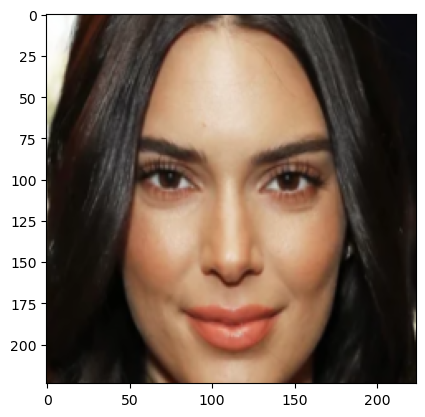

In [114]:
outs.shape
show_ = np.array(outs[0].permute((1,2,0)))
plt.imshow((show_+1)/2)
plt.imsave('myaffine.png',(show_+1)/2)

In [106]:

plt.imsave('hisaffine.png',aligned_img_gt/255)

In [82]:
outs.min()

tensor(-0.3518)

In [1]:
from kornia.geometry.transform import get_perspective_transform, warp_affine
from torch.linalg import lstsq as solver
import torch

def align_and_crop_with_5points_tensor(img, landmark, size=224):
        assert len(landmark.shape) == 3
        #src_pts = torch.tensor(landmark, dtype=torch.float64).unsqueeze(0)
        B = landmark.shape[0]
        REFERENCE_FACIAL_POINTS = [
                [30.29459953,  51.69630051],
                [65.53179932,  51.50139999],
                [48.02519989,  71.73660278],
                [33.54930115,  92.3655014],
                [62.72990036,  92.20410156]
                ]
        REFERENCE_FACIAL_POINTS = torch.tensor(REFERENCE_FACIAL_POINTS, dtype=torch.float64)
        REFERENCE_FACIAL_POINTS[..., 0] += 8
        REFERENCE_FACIAL_POINTS *= size / 112.0


        dst_pts = REFERENCE_FACIAL_POINTS.unsqueeze(0).repeat(B,1,1)
        # align dst to src

        tfm = torch.tensor([[1, 0, 0], [0, 1, 0]]).unsqueeze(0).repeat(B,1,1)
        n_pts = dst_pts.shape[1]
        ones = torch.ones((B, n_pts, 1), dtype=torch.float64)
        src_pts_ = torch.cat([landmark, ones],axis=-1)
        dst_pts_ = torch.cat([dst_pts, ones],axis=-1)

        A, res, rank, s = solver(src_pts_, dst_pts_)

        if rank == 3:
                tfm = torch.tensor([[A[..., 0, 0], A[..., 1, 0], A[..., 2, 0]],
                        [A[..., 0, 1], A[..., 1, 1], A[..., 2, 1]]],dtype=torch.float32).unsqueeze(0)
        elif rank==2:
                tfm = torch.tensor([[A[..., 0, 0], A[..., 1, 0], 0],
                        [A[..., 0, 1], A[..., 1, 1], 0]],dtype=torch.float32).unsqueeze(0)

        outs = warp_affine(img.float(), tfm, [size,size], padding_mode="zeros")

        return outs

In [2]:
from facenet_pytorch import MTCNN, InceptionResnetV1

mtcnn = MTCNN(image_size=(256), margin=0)


In [38]:
from facenet_pytorch import MTCNN, InceptionResnetV1

# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN(image_size=(256), margin=2)
#,_,lmdks = mtcnn.detect((gt.type(torch.float64).permute(0,2,3,1)+1)/2*255,landmarks=True)
_,_,ldmks_gt = mtcnn.detect((gt.type(torch.float64).permute(0,2,3,1)+1)/2*255,landmarks=True)

gt_aligned = align_and_crop_with_5points_tensor(gt, torch.tensor(ldmks_gt).squeeze(1))

_,_,ldmks_wp_middle = mtcnn.detect((wp_middle.type(torch.float64).permute(0,2,3,1)+1)/2*255,landmarks=True)

wp_middle_aligned = align_and_crop_with_5points_tensor(gt, torch.tensor(ldmks_wp_middle).squeeze(1))

/home/nas4_user/jaeseonglee/anaconda3/envs/eg3d/lib/python3.9/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


In [39]:
_,_,ldmks_w = mtcnn.detect((w_middle.type(torch.float64).permute(0,2,3,1)+1)/2*255,landmarks=True)

w_aligned = align_and_crop_with_5points_tensor(w_middle, torch.tensor(ldmks_w).squeeze(1))

In [48]:
_,_,ldmks_wp = mtcnn.detect((wp_middle.type(torch.float64).permute(0,2,3,1)+1)/2*255,landmarks=True)

wp_aligned = align_and_crop_with_5points_tensor(wp_middle, torch.tensor(ldmks_wp).squeeze(1))

/home/nas4_user/jaeseonglee/anaconda3/envs/eg3d/lib/python3.9/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


In [54]:
_,_,ldmks_wp_right = mtcnn.detect((wp_right.type(torch.float64).permute(0,2,3,1)+1)/2*255,landmarks=True)

wp_right_aligned = align_and_crop_with_5points_tensor(wp_right, torch.tensor(ldmks_wp_right).squeeze(1))

/home/nas4_user/jaeseonglee/anaconda3/envs/eg3d/lib/python3.9/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


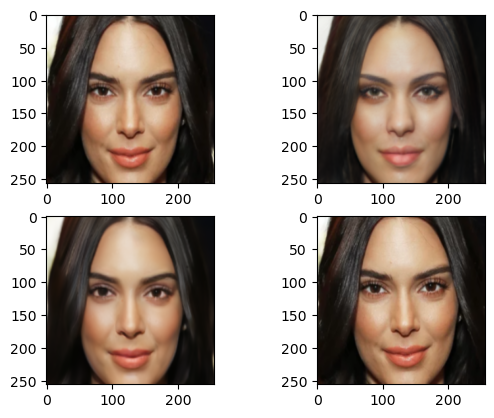

In [107]:
from skimage.transform import resize
show_gt = np.array(gt_aligned[0].permute((1,2,0)))
show_w = np.array(w_aligned[0].permute((1,2,0)))
show_wp = np.array(wp_aligned[0].permute((1,2,0)))
show_wp_right = np.array(wp_right_aligned[0].permute((1,2,0)))
fig, ax = plt.subplots(2,2)
#ax.imshow(random.rand(8, 90), interpolation='nearest')

ax[0,0].imshow(resize((show_gt+1)/2,(256,256)))
#plt.show()
ax[0,1].imshow(resize((show_w+1)/2,(256,256)))
ax[1,0].imshow(resize((show_wp+1)/2,(256,256)))
ax[1,1].imshow(resize((gt_np[30:210,15:235]/255),(256,256)))
#plt.imsave('myaffine3_mydtection.png',(show_+1)/2)

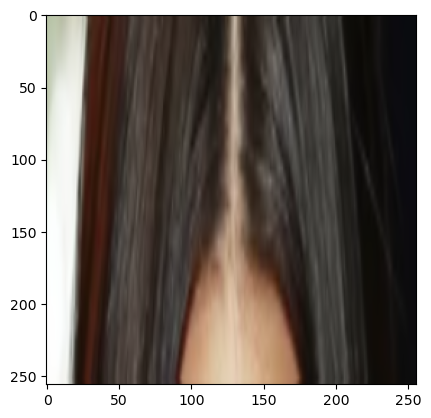

In [88]:
plt.imshow(resize((gt_np[10:40,15:230]/255),(256,256)))

In [63]:
gt_np.max()

255.0

In [51]:
criterion_ID(gt_aligned, w_aligned)

tensor([0.4332], grad_fn=<RsubBackward1>)

In [53]:
criterion_ID(gt_aligned, wp_aligned)

tensor([0.1249], grad_fn=<RsubBackward1>)

In [58]:
criterion_ID(wp_aligned, wp_right_aligned)

tensor([0.2318], grad_fn=<RsubBackward1>)

In [59]:
criterion_ID(gt_aligned, wp_right_aligned)

tensor([0.3578], grad_fn=<RsubBackward1>)

In [1]:
import imageio as io
import torch, os
import numpy as np
from skimage.transform import resize
from facenet_pytorch import MTCNN, InceptionResnetV1
#import sys
#sys.path.append('./training.facenet_pytorch_folder')
#from training.facenet_pytorch_folder.model.mtcnn import MTCNN

# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN(image_size=(256), margin=0)
path = './inthewild_datav2'
path = './sample_refined'
path = '/home/nas4_user/jaeseonglee/4D-Facial-Avatars/nerface_dataset/person_2/train/crop'

os.makedirs(path+'_kps',exist_ok=True)
for idx, i in enumerate(os.listdir(path)):
    if i[-3:] != 'png':
        continue

    else:
        img_temp  = torch.tensor(resize(io.imread(os.path.join(path,i)),(256,256)),dtype=torch.float32).unsqueeze(0)
        _, _, ldmk = mtcnn.detect(img_temp*255,landmarks=True)
        np.save(path+'_kps/'+i,ldmk.squeeze(0))
        #break
    print(idx)

#_,_,ldmks_wp_right = mtcnn.detect((wp_right.type(torch.float64).permute(0,2,3,1)+1)/2*255,landmarks=True)

/home/nas4_user/jaeseonglee/anaconda3/envs/eg3d/lib/python3.9/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
/home/nas4_user/jaeseonglee/anaconda3/envs/eg3d/lib/python3.9/site-packages/facenet_pytorch/models/utils/detect_face.py:250: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is "Min":
/home/nas4_user/jaeseonglee/anaconda3/envs/eg3d/lib/python3.9/site-packages/facenet_pytorch/models/utils/detect_face.py:250: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is "Min":


KeyboardInterrupt: 

In [19]:
img_temp.min()

tensor(0.0001)

In [17]:
np.load('./inthewild_data'+'_kps/'+'candal.png.npy',allow_pickle=True).shape

()

In [8]:
img_temp.min()

0

In [18]:
import sys,torch
#sys.path.append('/home/nas1_userC/jooyeolyun/repos/insightface/recognition/arcface_torch')

from training.arcface_torch.backbones import get_model
from training.arcface_torch.utils.utils_config import get_config
config  = '/home/nas1_userC/jooyeolyun/repos/insightface/recognition/arcface_torch/configs/wf42m_pfc_r50.py'
cfg = get_config(config)
backbone = get_model(cfg.network, dropout=0.0, fp16=cfg.fp16, num_features=cfg.embedding_size)
pp='/home/nas1_userC/jooyeolyun/repos/insightface/recognition/arcface_torch/work_dirs/wf42m_pfc_r50/model.pt'
backbone.load_state_dict(torch.load(pp, map_location='cpu'))
backbone.eval()

IResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (prelu): PReLU(num_parameters=64)
  (layer1): Sequential(
    (0): IBasicBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (prelu): PReLU(num_parameters=64)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): IBas

In [4]:
item = 'candal.png_10000.png'
w_path = '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/wild_w_picked'
wp_path = '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/out_inversion_mino'
#wpp_path = '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/wild_w++_picked'

#w_depth_path = '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/out_minho_depth'
import imageio as io
import torch
from skimage.transform import resize


image_w = torch.tensor(resize(io.imread(w_path+'/'+item),(256,256*5)).transpose(2,0,1))
image_w = (image_w.to(torch.float32)*2 -1 ).unsqueeze(0)

image_wp = torch.tensor(resize(io.imread(wp_path+'/'+item),(256,256*5)).transpose(2,0,1))
image_wp = (image_wp.to(torch.float32)*2 -1).unsqueeze(0)

In [7]:
gt = image_wp[...,:256]
wp_fake = image_wp[...,256:512]
w_fake = image_w[...,256:512]

In [8]:
w_fake.shape

torch.Size([1, 3, 256, 256])

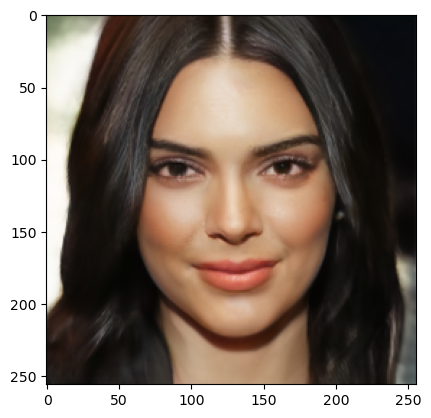

In [23]:
import matplotlib.pyplot as plt
plt.imshow(wp_fake.squeeze(0).permute(1,2,0)/2+1/2)

In [14]:
from facenet_pytorch import MTCNN, InceptionResnetV1

# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN(image_size=(256), margin=2)
#,_,lmdks = mtcnn.detect((gt.type(torch.float64).permute(0,2,3,1)+1)/2*255,landmarks=True)
_,_,ldmks_gt = mtcnn.detect((gt.type(torch.float64).permute(0,2,3,1)+1)/2*255,landmarks=True)
_,_,ldmks_w = mtcnn.detect((w_fake.type(torch.float64).permute(0,2,3,1)+1)/2*255,landmarks=True)
_,_,ldmks_wp = mtcnn.detect((wp_fake.type(torch.float64).permute(0,2,3,1)+1)/2*255,landmarks=True)

gt_aligned = F.interpolate(align_and_crop_with_5points_tensor(gt, torch.tensor(ldmks_gt).squeeze(1)),(112,112))
wp_aligned = F.interpolate(align_and_crop_with_5points_tensor(wp_fake, torch.tensor(ldmks_wp).squeeze(1)),(112,112))
w_aligned = F.interpolate(align_and_crop_with_5points_tensor(w_fake, torch.tensor(ldmks_wp).squeeze(1)),(112,112))

/home/nas4_user/jaeseonglee/anaconda3/envs/eg3d/lib/python3.9/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


In [15]:

import torch.nn.functional as F
gt_aligned.shape

torch.Size([1, 3, 112, 112])

In [12]:
resize(io.imread(w_path+'/'+item),(512,2560)).max()

1.0

In [37]:
import torch.nn.functional as F

In [45]:
gt_aligned_112 = F.interpolate(gt_aligned,112)
wp_middle_aligned_112 = F.interpolate(wp_middle_aligned,112)
w_middle_112 =F.interpolate(w_aligned,112)

In [19]:
gt_aligned_112.shape

torch.Size([1, 3, 112, 112])

In [25]:
gt_aligned_112.permute(0,2,3,1).shape

torch.Size([1, 112, 112, 3])

In [19]:
img_bunch = torch.cat([gt_aligned,wp_aligned,w_aligned])

In [20]:
a = backbone(img_bunch)

In [22]:
a.shape
a[0:1].shape
torch.cosine_similarity(a[0:1],a[1:2]), torch.cosine_similarity(a[0:1],a[2:3])

(tensor([0.7684], grad_fn=<DivBackward0>),
 tensor([0.4087], grad_fn=<DivBackward0>))

In [58]:
a.shape

gt_wp = (1-torch.cosine_similarity(a[0:1],a[1:2])).mean()

gt_w = (1-torch.cosine_similarity(a[0:1],a[2:])).mean()

In [62]:
gt_wp, gt_w

(tensor(0.1814, grad_fn=<MeanBackward0>),
 tensor(0.5919, grad_fn=<MeanBackward0>))

In [34]:
a.shape

torch.Size([2, 512])

In [ ]:
#dict_checkpoint = torch.load(os.path.join(cfg.output, f"checkpoint_gpu_{rank}.pt"))
#start_epoch = dict_checkpoint["epoch"]
#global_step = dict_checkpoint["global_step"]
#backbone.module.load_state_dict(dict_checkpoint["state_dict_backbone"])


In [1]:
data_path = '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/inthewild_data/dataset.json'

import json

with open(data_path ,'r') as f:
    data = json.load(f)

In [2]:
data = dict(data['labels'])


In [3]:
import numpy as np
datum = np.array(data['candal.png'])

In [4]:
ext = datum[:16]
int = datum[16:]

In [5]:
R=ext.reshape(4,4)[:3,:3]
T=ext.reshape(4,4)[:3,-1]

In [6]:
T,R
import math

In [7]:
def isRotationMatrix(R) :
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6
 
# Calculates rotation matrix to euler angles
# The result is the same as MATLAB except the order
# of the euler angles ( x and z are swapped ).
def RM2EA(R) :
 
    assert(isRotationMatrix(R))
 
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
 
    singular = sy < 1e-6
 
    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0
 
    return np.array([x, y, z])

In [8]:
def EA2RM(vec):
    theta_z = vec[2]
    theta_y = vec[1]
    theta_x = vec[0]

    Rx = np.array([[1,0,0],
                    [0,math.cos(theta_x),-math.sin(theta_x)],
                    [0,math.sin(theta_x),math.cos(theta_x)]])
    Ry = np.array([[math.cos(theta_y), 0 ,math.sin(theta_y)],
                    [0,1,0],
                    [-math.sin(theta_y),0,math.cos(theta_y)]])
    Rz = np.array([[math.cos(theta_z), -math.sin(theta_z),0],
                    [math.sin(theta_z),math.cos(theta_z),0],
                    [0,0,1]])
    return Rz@(Ry@Rx)

In [10]:
EA = RM2EA(R)

array([ 0.05203979, -0.00012775, -0.00047501])

In [11]:
RM2EA(EA2RM(EA))

array([ 2.98166032, -0.00731945, -0.02721581])

In [12]:
EA

array([ 2.98166032, -0.00731945, -0.02721581])

In [13]:
R

array([[ 0.99960291, -0.02803036,  0.00288968],
       [-0.02721172, -0.98684078, -0.15938906],
       [ 0.00731939,  0.15924715, -0.98721164]])

In [14]:
EA2RM(RM2EA(R))

array([[ 0.9996029 , -0.02803036,  0.00288968],
       [-0.02721172, -0.98684074, -0.15938907],
       [ 0.00731939,  0.15924714, -0.98721162]])

In [71]:
def sample(EA):
        
        radius = 2.7
        theta = EA[1]
        v = EA[0].clip(1e-5, math.pi - 1e-5) / math.pi
        phi = np.arccos(1 - 2*v)
        #phi = EA[2]

        camera_origins = np.zeros((1,3))

        camera_origins[:, 0:1] = radius*np.sin(phi) * np.cos(math.pi-theta)
        camera_origins[:, 2:3] = radius*np.sin(phi) * np.sin(math.pi-theta)
        camera_origins[:, 1:2] = radius*np.cos(phi)
        #return camera_origins

        r = 2.7
        phi = EA[0] +math.pi
        theta = EA[1]
        theta = math.pi+theta
        x = r*np.cos(theta)*np.cos(phi)
        y = r*np.cos(theta)*np.sin(phi)
        z = r*np.sin(theta)
        return x,y,z
    


In [72]:
sample(EA)

(-2.6654713632973746, 0.4299672791909427, 0.019762344667948097)

In [74]:
T
from camera_utils import LookAtPoseSampler, FOV_to_intrinsics
import torch

In [75]:
cam_pivot = torch.tensor([0, 0, 0])
cam_radius = 2.7
angle_y =0; angle_p=0
intrinsics = FOV_to_intrinsics(18.837)
cam2world_pose = LookAtPoseSampler.sample(np.pi/2 + angle_y, np.pi/2 + angle_p, cam_pivot, radius=cam_radius)
conditioning_cam2world_pose = LookAtPoseSampler.sample(np.pi/2, np.pi/2, cam_pivot, radius=cam_radius)
conditioning_params = torch.cat([conditioning_cam2world_pose.reshape(-1, 16), intrinsics.reshape(-1, 9)], 1)


In [85]:
cam2world_pose

tensor([[[ 1.0000e+00,  1.9107e-15,  4.3711e-08, -1.1802e-07],
         [ 0.0000e+00, -1.0000e+00,  4.3711e-08, -1.1802e-07],
         [ 4.3711e-08, -4.3711e-08, -1.0000e+00,  2.7000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]])

In [93]:
from pytorch3d.transforms import matrix_to_euler_angles as m2e
from pytorch3d.transforms import euler_angles_to_matrix as e2m
#m2e(e2m(m2e(cam2world_pose[:,:3,:3]),convention=["Z","Y","X"]))
m = cam2world_pose[:,:3,:3]


In [115]:
e = m2e(m,convention=["Z","Y","X"])
print(e)
e[...,0] = np.pi/3

tensor([[ 0.0000e+00, -4.3711e-08, -3.1416e+00]])


In [116]:
e

tensor([[ 1.0472e+00, -4.3711e-08, -3.1416e+00]])

In [117]:
m=e2m(e,convention=["Z","Y","X"])

In [118]:
e = m2e(m,convention=["Z","Y","X"])

In [119]:
e

tensor([[ 1.0472e+00, -4.3711e-08, -3.1416e+00]])

In [120]:
m.shape

torch.Size([1, 3, 3])

In [1]:
img_path= '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/sample_refined/seed0001_-1.2.png'
kp_path='/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/sample_refined_kps/seed0001_-1.2.png.npy'

In [2]:
import imageio as io
img = io.imread(img_path)
import numpy as np

kps= np.load(kp_path)



In [5]:
kps.shape

(1, 5, 2)

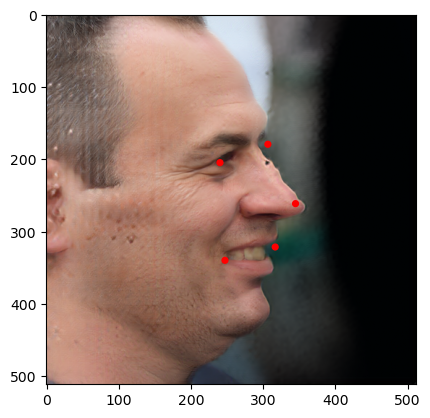

In [25]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
from matplotlib.patches import Circle
# Show the image
ax.imshow(img/255)

# Now, loop through coord arrays, and create a circle at each x,y pair
for i in range(5):
    circ = Circle((kps[0,i,0]*2,kps[0,i,1]*2),4, color='r')
    ax.add_patch(circ)


/tmp/ipykernel_29480/3890046172.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  A, res, rank, s = np.linalg.lstsq(src_pts_, dst_pts_)


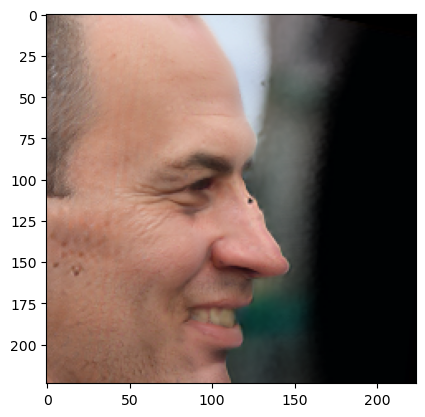

In [37]:

aligned_img= align_img(img,kps*2, size=224)
plt.imshow(aligned_img)

In [7]:
kp2_path ='/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/inthewild_datav2_kps/axel.png.npy'
img2_path = '/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/inthewild_datav2/axel.png'

In [21]:
img2 = io.imread(img2_path)
kp2=np.load(kp2_path)

In [22]:
kp2

array([[[ 90.41513 , 100.5937  ],
        [149.27374 ,  96.94923 ],
        [106.317856, 134.29071 ],
        [ 97.33752 , 173.14973 ],
        [149.83768 , 168.56883 ]]], dtype=float32)

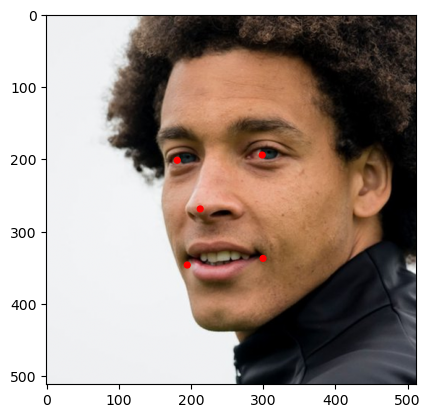

In [24]:
fig,ax1 = plt.subplots(1)
ax1.set_aspect('equal')

# Show the image
ax1.imshow(img2/255)

# Now, loop through coord arrays, and create a circle at each x,y pair
for i in range(5):
    circ = Circle((kp2[0,i,0]/256*512,kp2[0,i,1]/256*512),4, color='r')
    ax1.add_patch(circ)

In [33]:
#landmark = landmarkModel.get(gt_np)
aligned_img2 = align_img(img2, kp2*2, size=224)

/tmp/ipykernel_29480/3890046172.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  A, res, rank, s = np.linalg.lstsq(src_pts_, dst_pts_)


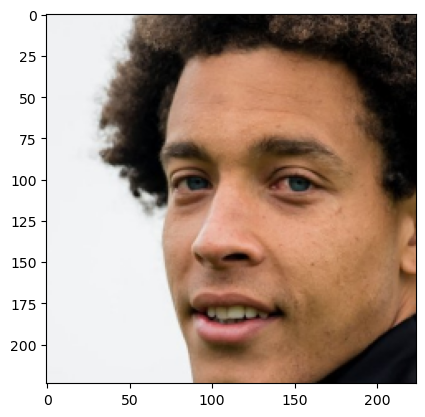

In [34]:
plt.imshow(aligned_img2)

In [1]:
path='/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/2022120601_01_03.JPG'

In [2]:
import imageio as io
from skimage.transform import resize
img = io.imread(path)

In [3]:
resize(img

(1702, 1466, 3)

In [4]:
import cv2
import numpy as np

# read image
img = cv2.imread(path)
old_image_height, old_image_width, channels = img.shape

# create new image of desired size and color (blue) for padding
new_image_width = 1466
new_image_height = 1954
color = (255,0,0)
result = np.full((new_image_height,new_image_width, channels), color, dtype=np.uint8)

# compute center offset
x_center = (new_image_width - old_image_width) // 2
y_center = (new_image_height - old_image_height) // 2

# copy img image into center of result image
result[y_center:y_center+old_image_height, 
       x_center:x_center+old_image_width] = img

# view result
cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save result
cv2.imwrite("lena_centered.jpg", result)

[ WARN:0@0.038] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('path'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'